# Precision x Recall

In [72]:
from sklearn import datasets as dt
from sklearn import tree as tr
from sklearn import model_selection as ms
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import linear_model as lm
import plotly.express as px
import pandas as pd


In [73]:
X, y = dt.make_classification(
    n_samples=500,
    n_classes=2,
    n_redundant=2,
    random_state=0
)

X


array([[ 2.0956007 ,  0.17225113,  1.19976071, ..., -0.17738506,
         0.08389199,  1.00258809],
       [ 1.41865106, -0.07478594, -0.83650393, ..., -0.99936077,
        -0.30923999, -1.06332786],
       [ 0.89530576,  0.43617873, -0.91615208, ...,  2.48362548,
        -0.81947419, -0.66487834],
       ...,
       [ 0.06478574, -0.36843634, -0.46370445, ...,  0.48878574,
        -0.02232695,  0.29740566],
       [-0.95658001,  1.19804727,  0.05456138, ...,  1.79841208,
        -0.25183161, -0.46045372],
       [-2.05907986,  0.86787669, -0.43496189, ...,  0.7040355 ,
         0.38334593, -0.06559649]])

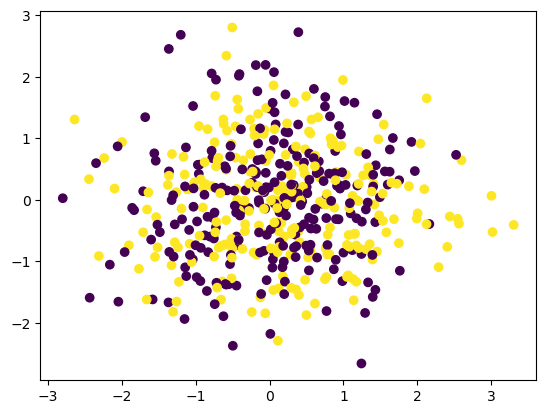

In [74]:
plt.scatter(X[:,0], X[:,1], c=y)

In [75]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

#define
model = lm.LogisticRegression(solver='lbfgs')

#fit
model.fit(X_train, y_train)

#performance
pred_test = model.predict(X_test)


In [76]:
# Probalidade do dado X test pertencer ao target 0 ou 1
prob_test = model.predict_proba(X_test)
prob_test

array([[4.04565632e-02, 9.59543437e-01],
       [1.15605986e-01, 8.84394014e-01],
       [2.92841110e-03, 9.97071589e-01],
       [5.41022022e-01, 4.58977978e-01],
       [9.41701754e-02, 9.05829825e-01],
       [1.55911534e-01, 8.44088466e-01],
       [7.13855540e-01, 2.86144460e-01],
       [7.86929806e-01, 2.13070194e-01],
       [2.40386924e-01, 7.59613076e-01],
       [2.27463112e-03, 9.97725369e-01],
       [4.55158139e-02, 9.54484186e-01],
       [9.27408702e-04, 9.99072591e-01],
       [3.37542462e-03, 9.96624575e-01],
       [7.33223525e-01, 2.66776475e-01],
       [3.37808591e-01, 6.62191409e-01],
       [8.13266660e-01, 1.86733340e-01],
       [2.64326651e-02, 9.73567335e-01],
       [1.53872189e-01, 8.46127811e-01],
       [1.67263869e-01, 8.32736131e-01],
       [9.76260848e-01, 2.37391519e-02],
       [2.26939025e-02, 9.77306097e-01],
       [9.80870348e-01, 1.91296524e-02],
       [9.86866204e-02, 9.01313380e-01],
       [9.18882154e-01, 8.11178462e-02],
       [2.745214

In [77]:
# Pegar somente 1 coluna, já que estão ligadas, resultando em 100 
prob_test = prob_test[:, 1]

In [78]:
# thresholds - são valores que servem como ponto de corte para tomar decisões em modelos
precision, recall, thresholds = mt.precision_recall_curve(y_test, prob_test)

Text(0, 0.5, 'Precision')

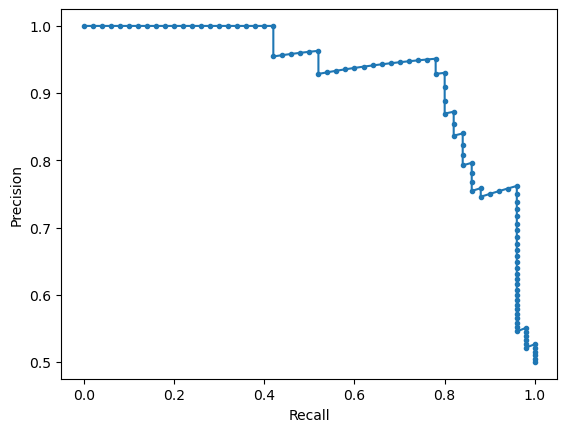

In [79]:
# A precision vai caindo a medida que a recall vai aumentando
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')


C:\Users\Luigi\AppData\Local\Temp\ipykernel_3552\257238890.py:1: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.



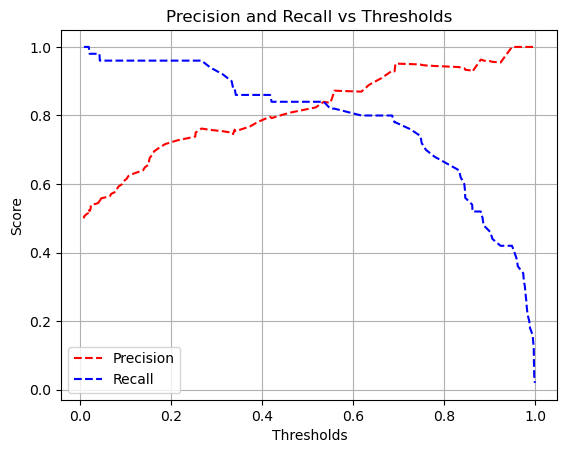

In [80]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision', color='r')
plt.plot(thresholds, recall[:-1], 'b--', label='Recall')
plt.title('Precision and Recall vs Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [102]:
# threshold de 0.56
threshold = 0.3

# Converter as probabilidades para rótulos com base no threshold
pred_test_thresholded = (prob_test >= threshold).astype(int)

# Previsões binárias usando o threshold 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Avaliação com o threshold
precision_at_threshold = precision_score(y_test, pred_test_thresholded)
recall_at_threshold = recall_score(y_test, pred_test_thresholded)
f1_at_threshold = f1_score(y_test, pred_test_thresholded)

print("Precision:", precision_at_threshold)
print("Recall:", recall_at_threshold)
print("F1-score:", f1_at_threshold)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, pred_test_thresholded)
print("Confusion Matrix:\n", conf_matrix)


Precision: 0.7540983606557377
Recall: 0.92
F1-score: 0.8288288288288288
Confusion Matrix:
 [[35 15]
 [ 4 46]]


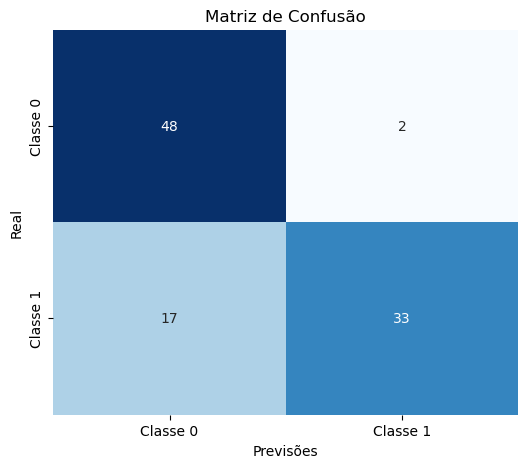

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, pred_test_thresholded)

# Plotar a matriz de confusão usando heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()
